In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 指定ax 
seaborn中，除了lmplot和clusterplot外，都可以指定ax，方便呈现多图

> add_subplot：自动切换ax

> subplots：不定数目ax迭代时，需要封闭在函数中（利用return）；或者人为切换ax

### fig, axes = plt.subplots(nrow, ncol)

In [ ]:
f,axes = plt.subplots(1,ax_num,figsize=(8*ax_num,8))
plt.tight_layout()
plt.subplots_adjust(left=0.15, bottom=0.1, top=0.9, right=0.95, hspace=0.2, wspace=0.25)

for nu,(_file,title,ax) in enumerate(zip(process_files,titles,axes)):

### fig.add_subplot(nrow, ncol, n) 

In [ ]:
f = plt.figure(figsize=(8*ax_num,8))
plt.tight_layout()
plt.subplots_adjust(left=0.15, bottom=0.1, top=0.9, right=0.95, hspace=0.2, wspace=0.25)

for nu,(_file,title) in enumerate(zip(process_files,titles)):
    ax = f.add_subplot(1, ax_num, 1+nu)

### 灵感来源 

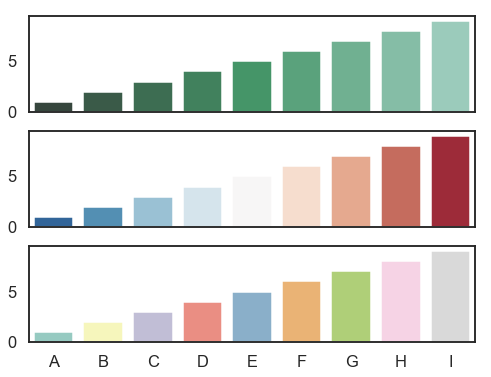

In [7]:
sns.set(style="white", context="talk")
rs = np.random.RandomState(7)
f, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(8, 6), sharex=True)

x = np.array(list("ABCDEFGHI"))
y1 = np.arange(1, 10)
sns.barplot(x, y1, palette="BuGn_d", ax=ax1)     #指定ax
ax1.set_ylabel("Sequential")

y2 = y1 - 5
sns.barplot(x, y2, palette="RdBu_r", ax=ax2)
ax2.set_ylabel("Diverging")

y3 = rs.choice(y1, 9, replace=False)
sns.barplot(x, y3, palette="Set3", ax=ax3)
ax3.set_ylabel("Qualitative")

sns.despine(bottom=True)
plt.setp(f.axes,yticks=[])
plt.tight_layout(h_pad=3)

plt.show()

### 源代码收获
隐藏某些坐标轴

In [ ]:
if sharex:
    for ax in self._not_bottom_axes:
        for label in ax.get_xticklabels():
            label.set_visible(False)
        ax.xaxis.offsetText.set_visible(False)
        
if sharey:
    for ax in self._not_left_axes:
        for label in ax.get_yticklabels():
            label.set_visible(False)
        ax.yaxis.offsetText.set_visible(False)

### 实际应用 

In [ ]:
## WGBS QC 
# Created by zty on 2019/1/8
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white",font_scale=2)

data = pd.read_csv("WGBS_QC.csv",index_col=0)
data = data.fillna(data.mean())
data["type"] = np.where(data.index.str.contains("T"),"Tumor","Normal")

varList = data.columns.tolist()[:-1]

f = plt.figure(figsize=(24,12))
#控制子图间距
plt.tight_layout()
plt.subplots_adjust(left=0.15,bottom=0.1,top=0.9,right=0.95,hspace=0.2,wspace=0.25)

for nu,var in enumerate(varList):
    ax = f.add_subplot(1,len(varList),1+nu)
    sns.boxplot("type",var,data=data,ax=ax)
    ax.set_xlabel("Group",fontdict={"size":16,"weight":"bold"})
    if var == "depth":
        ax.set_ylabel(var.capitalize(), fontdict={"size":20,"weight":"bold"})
    else:
        ax.set_ylabel("%s (%%)" %(var.capitalize()), fontdict={"size":20,"weight":"bold"})
    ax.set_title("%s" %(var.capitalize()),fontdict={"size":20,"weight":"bold"})
f.savefig('WGBS_boxplot.png', dpi=100, bbox_inches='tight')

## 多图标题
> sns：利用np.percentile判断在哪一个ax写标题

> matplotlib：利用add_gridspec和add_subplot为title空出一个子图，再利用set_axis_off()

### 示例 

In [ ]:
regulator_data = pd.read_csv("/root/mnt/analysis/baidu_II/PCA/GO_term_methy_regulator/dmr/log2FC_dmr_corr.csv",index_col=0)
regulator_data.rename(columns={"gene":"gene body"},inplace=True)
melt_regulator_data = pd.melt(regulator_data,var_name="type",value_name="value")
annotated_data = regulator_data.dropna(how="any")
annotated_data = annotated_data[(np.abs(annotated_data["gene body"]) >= 0.5) | (np.abs(annotated_data["promoter"]) >= 0.5)]

sns.set(style="white",font_scale=2)

f = plt.figure(figsize=(16,10))
gs = f.add_gridspec(10, 12)
ax1 = f.add_subplot(gs[1:, 0:4])
ax2 = f.add_subplot(gs[1:, 5:])
ax3 = f.add_subplot(gs[:1,:])

sns.boxplot(x="type",y="value",data=melt_regulator_data,ax=ax1)
ax1.set_xlabel("",fontdict={"size": 20, "weight": "bold"})
ax1.set_ylabel("correlation",fontdict={"size": 20, "weight": "bold"})

sns.scatterplot(x="gene body", y="promoter", data=regulator_data.fillna(0),ax=ax2)
ax2.set_xlabel("Gene body",fontdict={"size": 20, "weight": "bold"})
ax2.set_ylabel("Promoter",fontdict={"size": 20, "weight": "bold"})

for gene in annotated_data.index:
    x_value = annotated_data.ix[gene]["gene body"]
    y_value = annotated_data.ix[gene]["promoter"]
    ax2.annotate(gene,xy=(x_value,y_value),xytext=(x_value+0.1,y_value-0.1),arrowprops=dict(facecolor="red", shrink=0.05))

# 具体坐标需要调试
ax3.text(0.2,0.8,"GO_term_methy_regulator",transform=ax3.transAxes,fontsize=20, fontweight='bold', va='top')
ax3.set_axis_off()

f.savefig("/root/mnt/analysis/baidu_II/PCA/GO_term_methy_regulator/dmr/merge.png",dpi=100,bbox_inches='tight')

## 模仿pheatmap
基于gridspec划分多图空间